In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#importing the data set
df = pd.read_csv('segmentation data.csv')
print(df.shape)
df.info()

(2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
#columns names and data types
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [5]:
#looking for the actual data
df.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
#lets look at the explanations for each variable int the segmentation data legend document
df_l = pd.read_excel('segmentation data legend.xlsx', sheet_name='Sheet1')
df_l.head(5)

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of information about the ...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,ID,numerical,Integer,Shows a unique identificator of a customer.
4,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dealing with missing values
for colName, colData in df.items():
    print(colName, ':', df[colName].isna().sum())

ID : 0
Sex : 0
Marital status : 0
Age : 0
Education : 0
Income : 0
Occupation : 0
Settlement size : 0


In [8]:
#Perfom exploratory data analysis
print(df.columns)

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


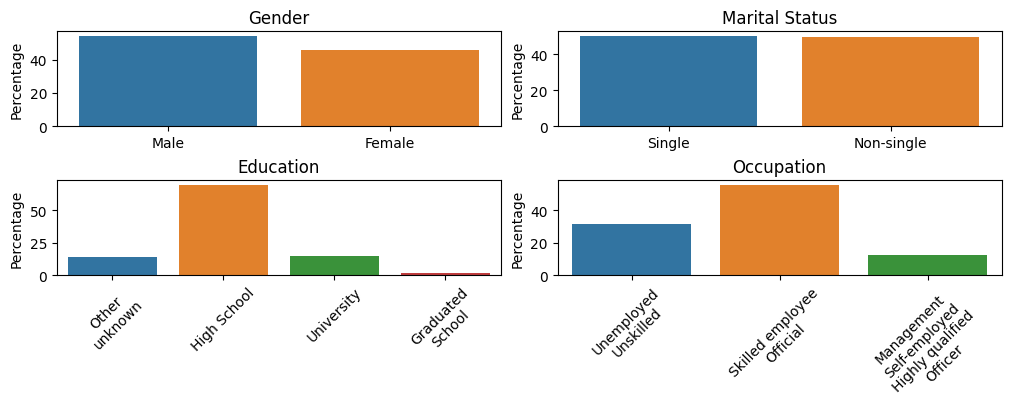

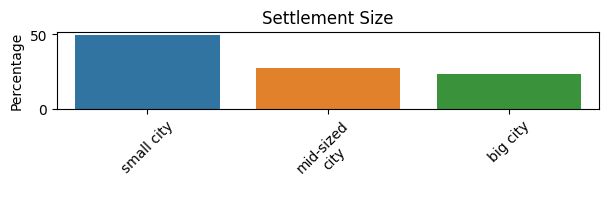

In [9]:
#plotting categorical data, 5 variables:
#fig, ((ax1,ax2), ax3, (ax4,ax5)) = plt.subplots(ncols=2, nrows=3, figsize=(15,5))
fig = plt.figure(figsize=(10, 5), constrained_layout=True)

#Sex
ax0 = fig.add_subplot(3,2,1)
counts = df['Sex'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax0)
ax0.set_xticklabels(['Male', 'Female'], rotation=0)
ax0.set_ylabel("Percentage")
ax0.set_title('Gender')

#Marital Status
ax1 = fig.add_subplot(3,2,2)
counts = df['Marital status'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax1)
ax1.set_xticklabels(['Single', 'Non-single'], rotation=0)
ax1.set_ylabel("Percentage")
ax1.set_title('Marital Status')

#Education
ax2 = fig.add_subplot(3,2,3)
counts = df['Education'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax2)
ax2.set_xticklabels(['Other\nunknown', 'High School', 
                     'University', 'Graduated\nSchool'], rotation=45)
ax2.set_ylabel("Percentage")
ax2.set_title('Education')

#Occupation
ax3 = fig.add_subplot(3,2,4)
counts = df['Occupation'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax3)
ax3.set_xticklabels(['Unemployed\nUnskilled', 'Skilled employee\nOfficial', 
               'Management\nSelf-employed\nHighly qualified\nOfficer'], rotation=45)
ax3.set_ylabel("Percentage")
ax3.set_title('Occupation')

plt.show()

#Settlement size
fig2 = plt.figure(figsize=(7, 1))
ax4 = fig2.add_subplot(1,1,1)
counts = df['Settlement size'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax4)
ax4.set_xticklabels(['small city', 'mid-sized\ncity',
                    'big city'], rotation=45)
ax4.set_ylabel("Percentage")
ax4.set_title('Settlement Size')
#plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=10, hspace=None)

plt.show()

Text(0.5, 1.0, 'Income')

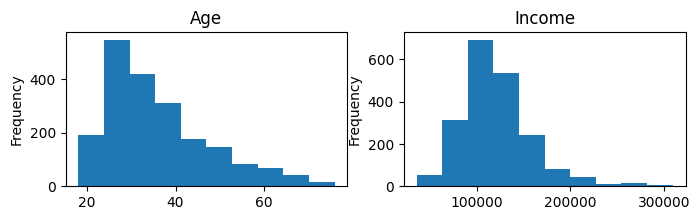

In [10]:
#plotting quantitative data
fig = plt.figure(figsize=(8,2))

ax0 = fig.add_subplot(1,2,1)
df.Age.plot.hist(ax=ax0)
ax0.set_title('Age')

ax1 = fig.add_subplot(1,2,2)
df.Income.plot.hist(ax=ax1)
ax1.set_title('Income')

In [11]:
#dropping ID
df = df.drop('ID', axis=1)

#Exploring correlations
df_numeric = df.drop(['Sex', 'Marital status'], axis=1)
corr = df_numeric.corr()
corr

,Age,Education,Income,Occupation,Settlement size
Age,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.654605,1.000000,0.233459,0.064524,0.034732
Income,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,0.119751,0.034732,0.490881,0.571795,1.000000


<AxesSubplot: >

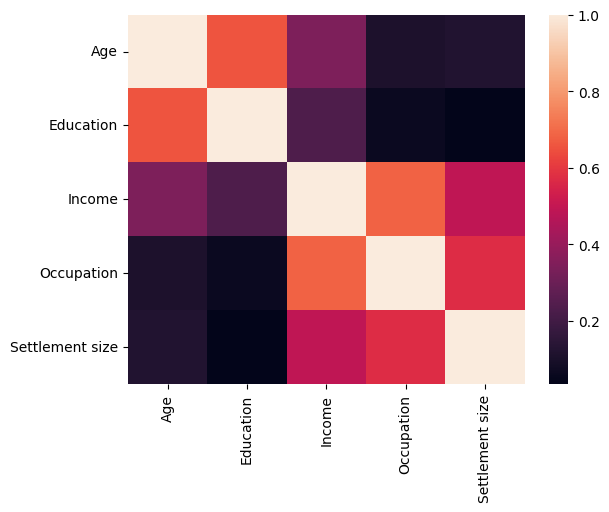

In [12]:
#And visualizing
sns.heatmap(corr)

In [13]:
#some statistics of continuous and ordinal data
df_numeric.describe()

,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,35.909000,1.03800,120954.419000,0.810500,0.739000
std,11.719402,0.59978,38108.824679,0.638587,0.812533
min,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,42.000000,1.00000,138072.250000,1.000000,1.000000
max,76.000000,3.00000,309364.000000,2.000000,2.000000


In [14]:
#Ecoding categorical variables: Sex, marital status, and occupation
#(note: Education and settlement size is going to be considered ordinal data for this clusterin problem

#df_dummies = pd.get_dummies(df, prefix=['Sex', 'Marital status', 'Occupation'] ,columns=['Sex', 'Marital status', 'Occupation'])
#df_dummies.head(3)

In [15]:
#Train three different models: Kmean, HDBSCAN , and Gaussian mixture model
# not a trivial task.
#Start wiht k-means, find right K with elbow and siluothe
#Then try HDBSCAN in the new library and find evaluation metrics
#finally, implement GMM and use one method that applies to it for chosing K

#finally, visualize some 3d plots of their clusters
df.columns
df.Occupation.value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [16]:
#Preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_cols = ['Age', 'Income']
ordinal_cols = ['Education', 'Settlement size']
cath_cols = ['Sex', 'Marital status', 'Occupation']

numeric_transformer = Pipeline([('inputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())
                               ])
cath_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                             ('onehot', OneHotEncoder())
                            ])
ordinal_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                               ('ord_encod', OrdinalEncoder())
                               ])

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_cols),
                                ('ordinal', ordinal_transformer, ordinal_cols),
                                ('cath', cath_transformer, cath_cols),
                                ])

X = preprocessor.fit_transform(df)
#X preserves ther order in which the variables were fed to the transformer
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,2.653614,0.097524,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.187132,0.782654,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.117316,-0.833202,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.775916,1.328386,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.458716,0.736932,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.946616,0.067471,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1996,-0.760382,-0.084265,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1997,-0.418983,-0.906957,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1998,-1.016432,-0.603329,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [19]:
from sklearn.cluster import KMeans
import numpy as np

inertias = []
for i in range(1, 10):
    #averaging multiple runs
    score = []
    for j in range(10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score.append(kmeans.inertia_)
    inertias.append(np.average(np.array(score)))

Text(0.5, 0, 'Number of Clusters')

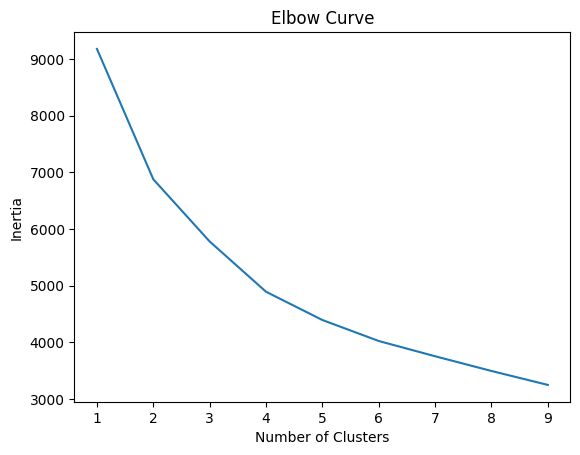

In [20]:
#plot the elbow curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10), inertias)
ax.set_title('Elbow Curve')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of Clusters')


In [19]:
#Using the silhouette method
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for i in range(2, 10):
    #averaging multiple runs
    score = []
    for j in range(10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score.append(silhouette_score(X, kmeans.labels_ , metric='euclidean'))
    silhouette_scores.append(np.average(np.array(score)))

Text(0.5, 0, 'Number of Clusters')

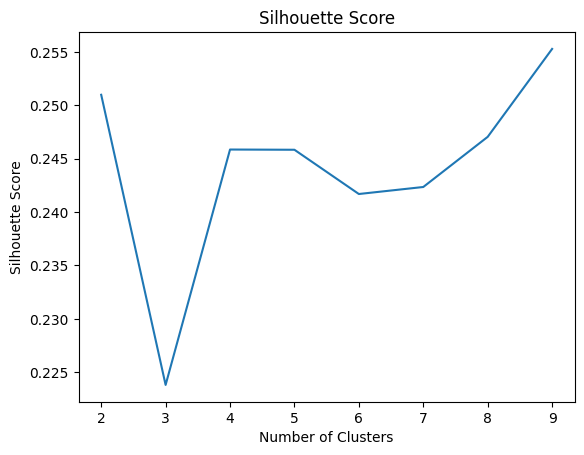

In [196]:
#plot the silhouette_score
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(2,10), silhouette_scores)
ax.set_title('Silhouette Score')
ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Clusters')

In [148]:
#Also try prediction strenght to determine K

In [39]:
#K = 4 is the value to be chosen
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=4)

In [40]:
#Non-deterministic algorithm, we get diff. score each time
score = []
for j in range(10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_ , metric='euclidean'))
scoreKmeans_silh = np.average(np.array(score))
scoreKmeans_silh

0.24581952981211092

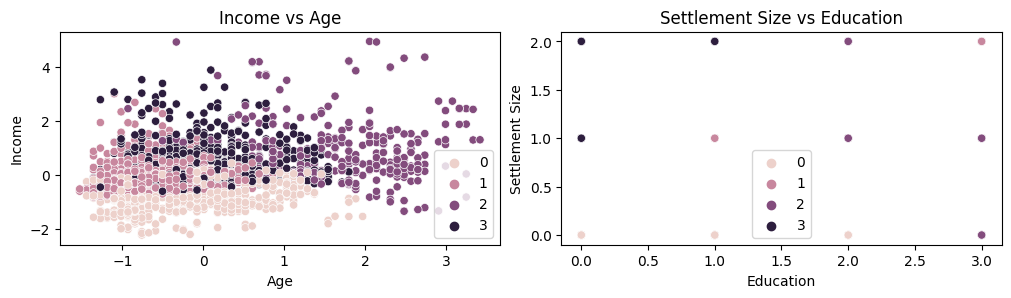

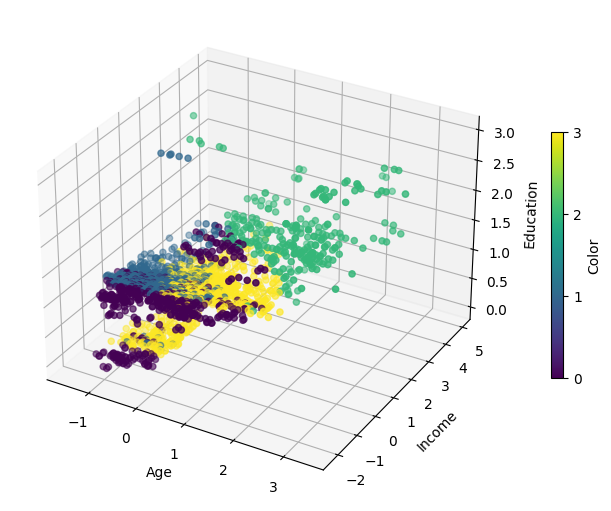

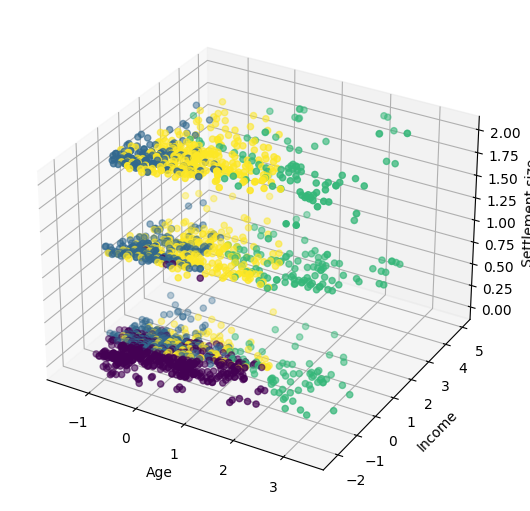

In [51]:
# Visualize the clusters, one run
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=kmeans.labels_, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Color')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=kmeans.labels_)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')


plt.show()

In [22]:
#HDBSCAN
#A basic example
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=120, min_samples=20)

clusterer.fit(X)
clusterer.labels_.max()

5


[clusteval] >Fit using hdbscan with metric: euclidean, and linkage: ward
[clusteval] >Estimated number of clusters: 245
[clusteval] >Silhouette Coefficient: 0.263
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [246].
[clusteval] >Fin.
[clusteval] >Estimated number of n_clusters: 245, average silhouette_score=0.229


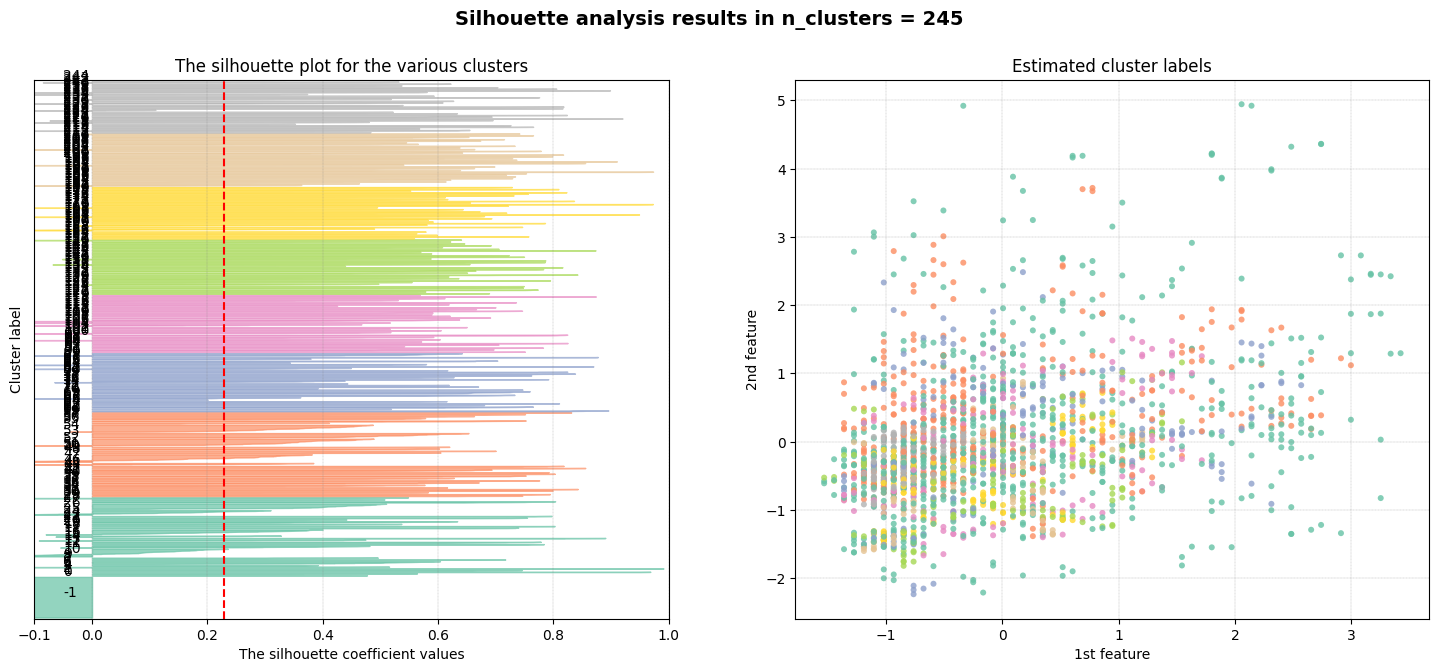

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot: title={'center': 'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot: title={'center': 'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [23]:
#HDBSCAN with an external library clusteval
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from clusteval import clusteval

# Initialize
ce = clusteval(cluster='hdbscan')

# Fit
ce.fit(X)

# Plot
#ce.plot()
#ce.dendrogram()
ce.scatter(X)


In [27]:
#Trying a different approach
score = []
num_clust = []
min_clust = []
min_sample = []
for i in range(2,16,2):
    for j in range(20, 300, 20):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=j, min_samples=i)
        clusterer.fit(X)
        
        score.append(silhouette_score(X, clusterer.labels_))
        num_clust.append(clusterer.labels_.max())
        min_clust.append(j)
        min_sample.append(i)
        #print('min_cluster_size : ', j, '  min_samples : ', i)
        #print('Silhouette score:', silhouette_score(X, clusterer.labels_))
        #print('Number of clusters:', clusterer.labels_.max())
results = pd.DataFrame({'min_cluster_size' : min_clust,
                       'min_samples' : min_sample,
                       'Silhouette score' : score,
                       'Number of clusters' : num_clust})

In [35]:
#ordering
ordered = results.sort_values('Silhouette score', ascending=False)
#ordered[ordered['Number of clusters']==5]
ordered.head(30)

,min_cluster_size,min_samples,Silhouette score,Number of clusters
0,20,2,0.299667,28
28,20,6,0.297056,26
14,20,4,0.295286,28
42,20,8,0.284585,25
56,20,10,0.274246,25
1,40,2,0.260948,18
15,40,4,0.259181,18
29,40,6,0.256796,18
70,20,12,0.256183,24
43,40,8,0.255862,18


In [21]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=140, min_samples=2)

clusterer.fit(X)

HDBSCAN(min_cluster_size=140, min_samples=2)

Silhouette score: 0.18731734214508705
Number of clusters: 5


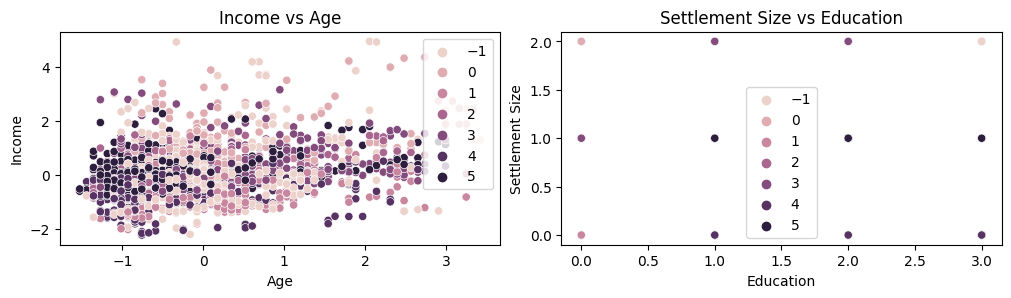

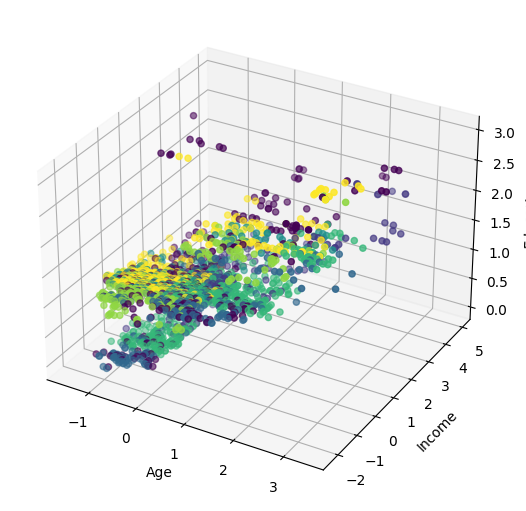

In [37]:
#picking the one with the highest score but a small number of clusters
clusterer = hdbscan.HDBSCAN(min_cluster_size=140, min_samples=2)

clusterer.fit(X)

print('Silhouette score:', silhouette_score(X, clusterer.labels_))
print('Number of clusters:', clusterer.labels_.max())

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = clusterer.labels_

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=labels, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

plt.show()

In [40]:
#Exploring the labels
pd.DataFrame(clusterer.labels_).value_counts()

 3    465
 5    430
-1    293
 1    266
 4    244
 0    151
 2    151
dtype: int64

In [41]:
#finally, GMM
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x00000277B64A9440>)

In [68]:

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]

#Back to the original sign
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
9,4,tied,-16863.496651
11,6,tied,-16828.176773
10,5,tied,-16687.196795
20,3,full,-15429.298321
19,2,full,-12675.291636


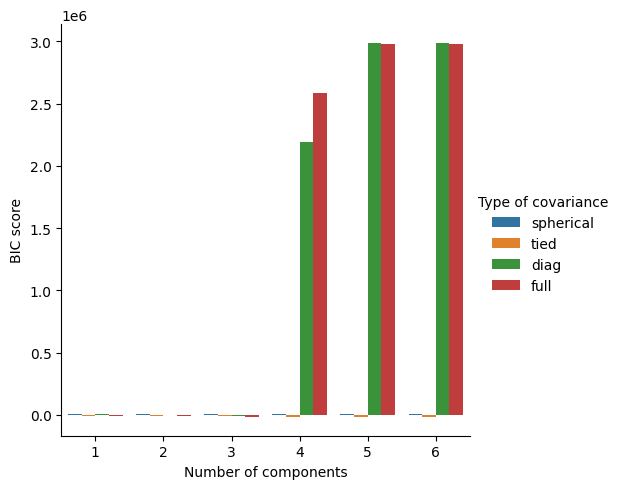

In [89]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

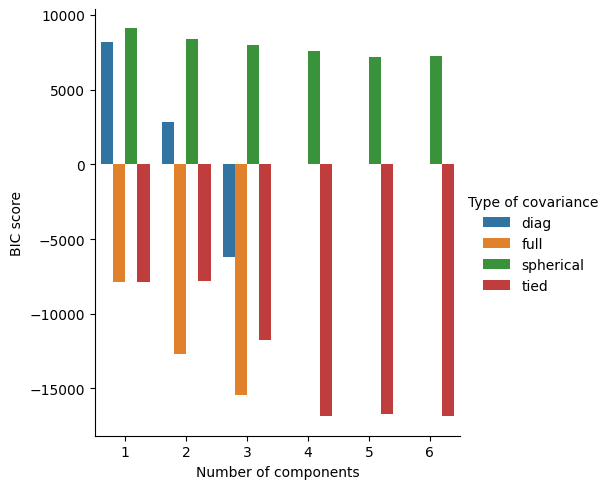

In [121]:
#supressing high values for visualization purpuses
df_lower_values = pd.DataFrame(df.groupby(["Number of components", "Type of covariance"]).value_counts())
df_lower_values = df_lower_values.drop(index=[(4, 'full'), (4, 'diag'), (5, 'full'), (5, 'diag'), (6, 'full'), (6, 'diag')])
df_lower_values = df_lower_values.reset_index(level=[0,1])
df_lower_values = df_lower_values.reset_index()

sns.catplot(
    data=df_lower_values,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [ ]:
#tied and 4 clusters seem to be the most optimal

In [ ]:
#Calculating the silhouette index
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    silhouette_score(X, clusterer.labels_)
    return estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

In [134]:
#Trying a different approach
score = []
num_clust = []
covariance_type = []
n_components = []
for i in range(2, 7):
    for j in ["spherical", "tied", "diag", "full"]:
        clusterer = GaussianMixture(n_components=i, covariance_type=j)
        clusterer.fit(X)
        
        score.append(silhouette_score(X, clusterer.predict(X)))
        num_clust.append(clusterer.predict(X).max())
        covariance_type.append(j)
        n_components.append(i)
        #print('min_cluster_size : ', j, '  min_samples : ', i)
        #print('Silhouette score:', silhouette_score(X, clusterer.labels_))
        #print('Number of clusters:', clusterer.labels_.max())
results = pd.DataFrame({'covariance_type' : covariance_type,
                       'n_components' : n_components,
                       'Silhouette score' : score,
                       'Number of clusters' : num_clust})
results.head()

,covariance_type,n_components,Silhouette score,Number of clusters
0,spherical,2,0.240627,1
1,tied,2,0.225314,1
2,diag,2,0.212145,1
3,full,2,0.233361,1
4,spherical,3,0.200395,2


In [133]:
#ordering
ordered = results.sort_values('Silhouette score', ascending=False)
#ordered[ordered['Number of clusters']==5]
ordered.reset_index().head(30)
#pd.DataFrame(ordered.groupby(["n_components", "covariance_type"]).value_counts())

,index,covariance_type,n_components,Silhouette score,Number of clusters
0,0,spherical,2,0.240794,1
1,3,full,2,0.233361,1
2,11,full,4,0.227982,3
3,1,tied,2,0.225839,1
4,15,full,5,0.215581,4
5,2,diag,2,0.212145,1
6,18,diag,6,0.203867,5
7,17,tied,6,0.202684,5
8,9,tied,4,0.202006,3
9,13,tied,5,0.197450,4


In [135]:
#tied and 4 clusters seem to be i the eight position regarding with this index
#dropping 2 cluster options and also the options with  very high values of BIC score we are left with:
#6 tied
#4 tied
#5 tied
#they are prety close in the BIC index. I am going to pic 4-tied since it performs good in both silhouette
#Bic scores

In [23]:
from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(n_components=4, covariance_type='tied')

clusterer.fit(X)

GaussianMixture(covariance_type='tied', n_components=4)

Silhouette score: 0.1983372469931104
Number of clusters: 3


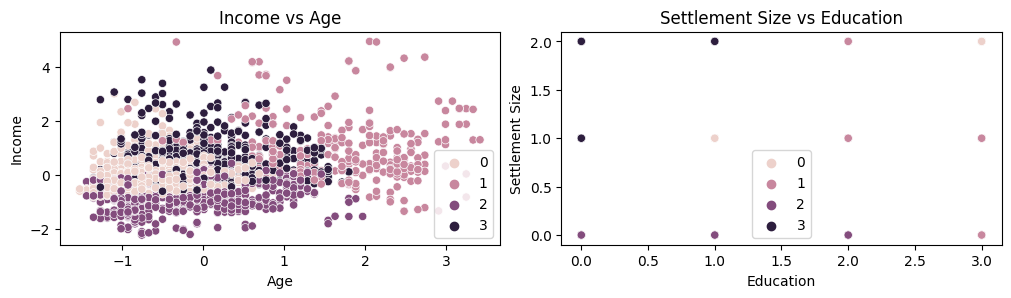

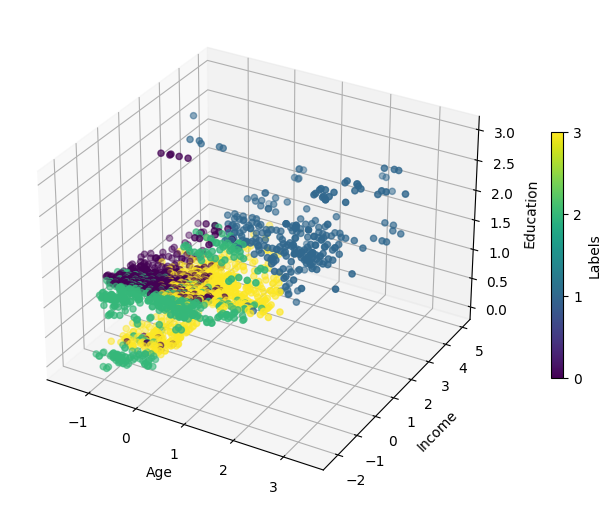

In [60]:
#visualizing labels

clusterer = GaussianMixture(n_components=4, covariance_type='tied')

clusterer.fit(X)

print('Silhouette score:', silhouette_score(X, clusterer.predict(X)))
print('Number of clusters:', clusterer.predict(X).max())

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = clusterer.predict(X)

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=kmeans.labels_, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Labels')

plt.show()



In [25]:
#Now the comparison between the three algorithms to pick the optimal one.
data = {'Algorithm': ['K-Means', 'HDBSCAN', 'GMM'],
        'Silhouette_score': [0.24584651531810206, 0.18731734214508705, 0.202006],
        'Number_of_clusters': [4, 6, 4]}
df_scores = pd.DataFrame(data)
df_scores

,Algorithm,Silhouette_score,Number_of_clusters
0,K-Means,0.245847,4
1,HDBSCAN,0.187317,6
2,GMM,0.202006,4


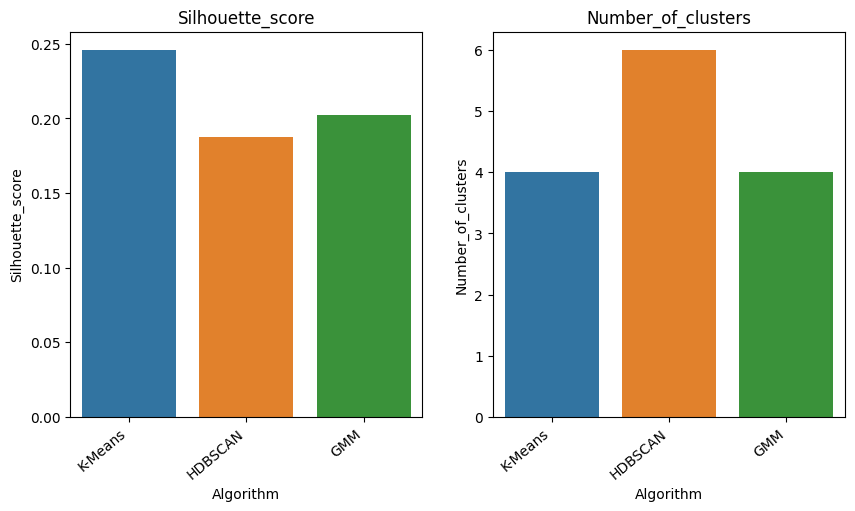

In [26]:
# create two plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='Algorithm', y='Silhouette_score', ax=ax1, data=df_scores)
sns.barplot(x='Algorithm', y='Number_of_clusters', ax=ax2, data=df_scores)

# set titles for plots
ax1.set_title("Silhouette_score")
ax2.set_title("Number_of_clusters")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

# display the plots
plt.show()

In [145]:
#The choosen algorithm is K-means with k=4. It performs good with a reduced number of cluster, which is desired in this case

In [65]:
#Training the final algorithm

from sklearn.metrics import silhouette_score
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_ , metric='euclidean')

0.2459270047267415

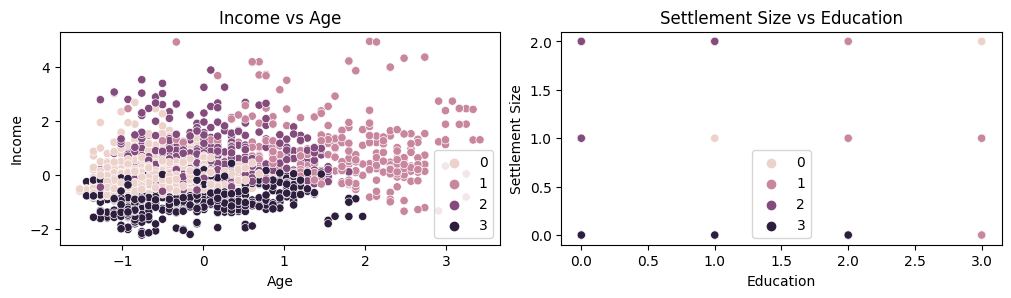

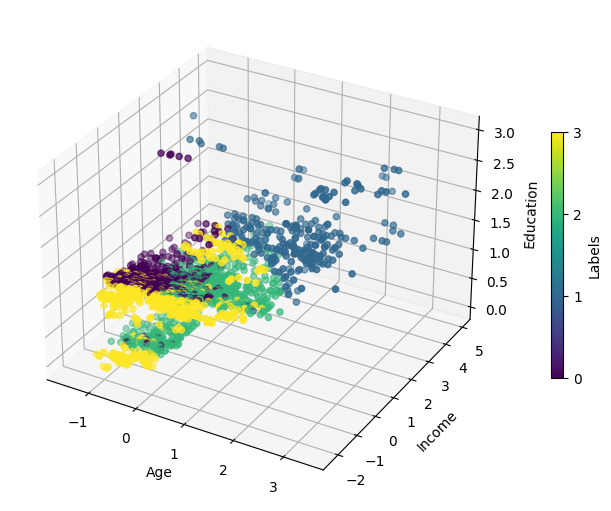

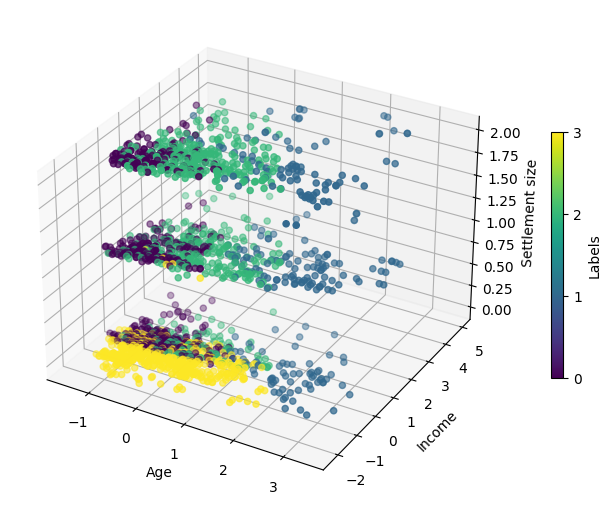

In [66]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X)

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=kmeans.labels_, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Labels')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')

colorbar.set_label('Labels')

plt.show()

In [34]:
#adding the labels to the original dataset
df_noID = df.drop('ID', axis=1)
df_labels = df_noID.copy() 
df_labels['Labels'] = kmeans.labels_
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [38]:
#We can see that the customers have been segmentated in a consistent way
df_all = pd.DataFrame(df_labels.groupby(['Education', 'Occupation']).value_counts())
print(df_all.to_string())

                                                                           0
Education Occupation Sex Marital status Age Income Settlement size Labels   
0         0          0   0              21  59127  0               1       1
                                            59255  0               1       1
                     1   0              26  64860  0               1       1
                                        33  69523  0               1       1
                                        32  81907  0               1       1
                                            68347  0               1       1
                                        31  76384  0               1       1
                                            72361  0               1       1
                                        30  88652  0               1       1
                                        29  85637  0               1       1
                                            80852  0               1       1